# TASK 1
**Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms**.

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\DATASET\Housing Price data set.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [6]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

In [7]:
#  handle missing values if necessary
df.dropna(inplace=True)

<Axes: >

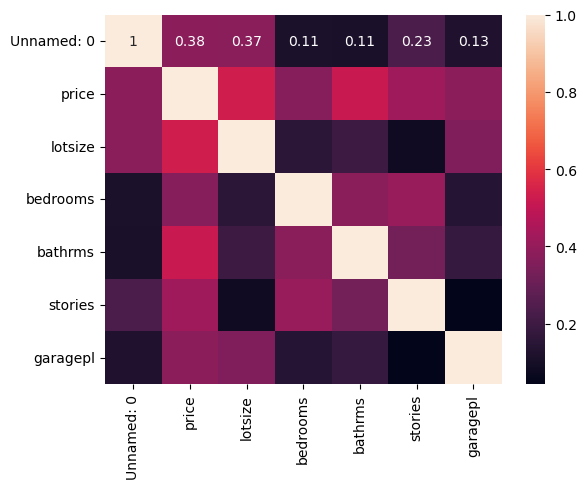

In [25]:
# explore the correlation between variables
sns.heatmap(df.corr(), annot=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_928\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

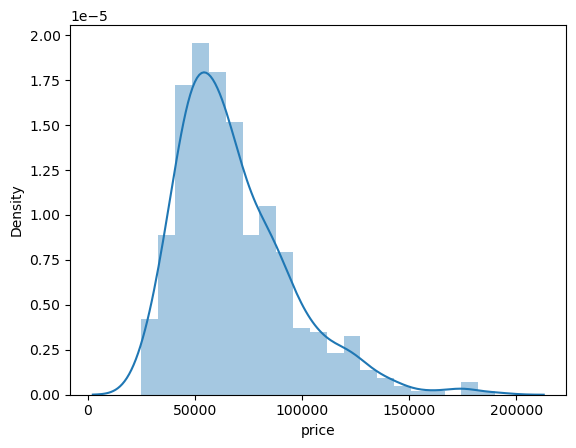

In [21]:
sns.distplot(df['price'])

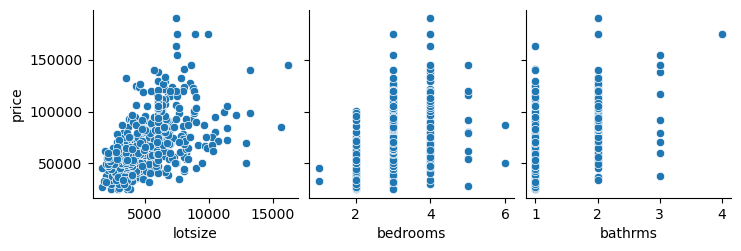

In [10]:
# visualize the relationship between independent and dependent variables
sns.pairplot(df, x_vars=['lotsize', 'bedrooms', 'bathrms'], y_vars='price')
plt.show()

In [11]:
# split the data into features and target variable
X=df[['lotsize', 'bedrooms', 'bathrms']]
Y=df[['price']]

In [12]:
# split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
# create a linear regression model
lm=LinearRegression()

In [28]:
# train the model
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
# make predictions
Y_pred = model.predict(X_test)

In [30]:
print(lm.intercept_)

[-1481.13853441]


In [35]:
coeff_df = pd.DataFrame(lm.coef_.T, index=X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
lotsize,5.412737
bedrooms,5687.116652
bathrms,19741.442839


In [36]:
predictions=lm.predict(X_test)

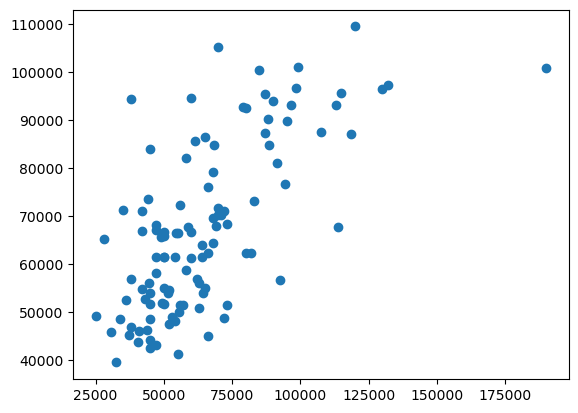

In [37]:
plt.scatter(Y_test,predictions)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_928\4168302754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions), bins=50)
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

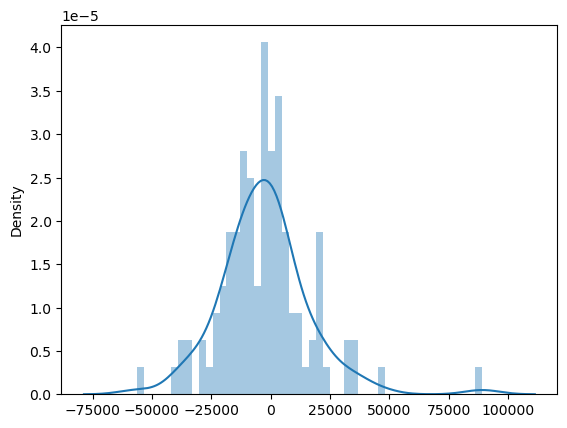

In [38]:
sns.distplot((Y_test-predictions), bins=50)